In [ ]:
"""
First we need to import all neccessary libraries that we will need to use
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
"""
Now we will read the csv file that contains the dataset using pandas and will display the first 5 row using .head()
"""

'\nNow we will read the csv file that contains the dataset using pandas and will display the first 5 row using .head()\n'

In [ ]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
"""
Let's take a look at 10 random samples from this dataset
"""

"\nLet's take a look at 10 random samples from this dataset\n"

In [ ]:
df.sample(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
617,Girl,6-10,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
224,Girl,21-25,University,Non Government,No,No,Low,Mid,Wifi,4G,0,No,Mobile,Low
334,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Mobile,Moderate
945,Boy,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
1074,Girl,11-15,School,Non Government,Yes,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1126,Boy,21-25,University,Non Government,Yes,No,High,Mid,Mobile Data,3G,3-6,No,Computer,Low
911,Boy,16-20,University,Government,No,Yes,Low,Mid,Wifi,4G,3-6,Yes,Computer,Low
1037,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Wifi,4G,1-3,Yes,Mobile,Moderate
410,Boy,21-25,University,Non Government,Yes,Yes,Low,Rich,Wifi,4G,1-3,Yes,Computer,High
814,Boy,11-15,School,Non Government,No,Yes,Low,Rich,Mobile Data,3G,1-3,No,Mobile,High


In [ ]:
"""
We need to know how many rows(instances) and columns(including the target) do we have
"""

In [ ]:
df.shape

(1205, 14)

In [ ]:
"""
Make sure no column has NAN values
"""

In [ ]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [ ]:
"""
Make sure no column has NULL values
"""

In [ ]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [ ]:
"""
Look at some info including the datatype of the values in each column
in our case all are object (categorical) and from here we know that we won't do normalization
"""

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [ ]:
"""
Look at some statistical analysis (count, number of values (unique), top (nonsense here because this is a categorical data), freq)
"""

In [ ]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [ ]:
"""
Look at the data distribution among the classes to see if it is balanced or unbalanced
"""

Adaptivity Level
Moderate    625
Low         480
High        100
Name: count, dtype: int64


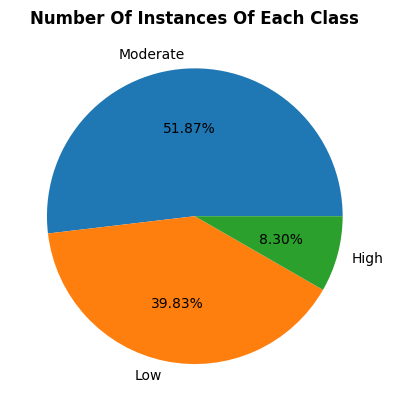

In [ ]:
print(df['Adaptivity Level'].value_counts())
plt.pie(df['Adaptivity Level'].value_counts(), labels = ['Moderate', 'Low', 'High'], autopct = "%.2f%%")
plt.title('Number Of Instances Of Each Class', fontsize= 12, fontweight = 'bold')
plt.show()

In [ ]:
"""
Observation 1: Data unbalanced and we need to do respampling but because of the small dataset itself
we cannot do downsampling instead we will do upsampling
"""

In [ ]:
majority = df[df['Adaptivity Level'] == "Moderate"]
minority_low = df[df['Adaptivity Level'] == "Low"]
minority_high = df[df['Adaptivity Level'] == "High"]

df_minority_low_upsampled = resample(minority_low, replace = True, n_samples = len(majority), random_state = 0)
df_minority_high_upsampled = resample(minority_high, replace = True, n_samples = len(majority), random_state = 0)

df_upsampled = pd.concat([majority, df_minority_low_upsampled, df_minority_high_upsampled])
print(df_upsampled['Adaptivity Level'].value_counts())

Adaptivity Level
Moderate    625
Low         625
High        625
Name: count, dtype: int64


In [ ]:
"""
Let's encode the categorical data
"""

In [ ]:
encoder = LabelEncoder()
for feature in df_upsampled.columns:
  df_upsampled[feature] = encoder.fit_transform(df_upsampled[feature])
df_upsampled

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
7,0,1,1,1,0,1,1,0,1,2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,0,1,1,1,0,1,1,0,0,2,1,0,1,0
1106,1,5,1,1,0,1,1,0,1,1,1,0,1,0
451,1,3,2,1,1,1,1,2,1,2,2,0,0,0
1141,0,1,1,1,0,1,1,2,0,1,1,0,1,0


In [ ]:
"""
Knowing the correlation between features is important although resampling the data has almost destroyed the correlation
between features(not including target)
"""

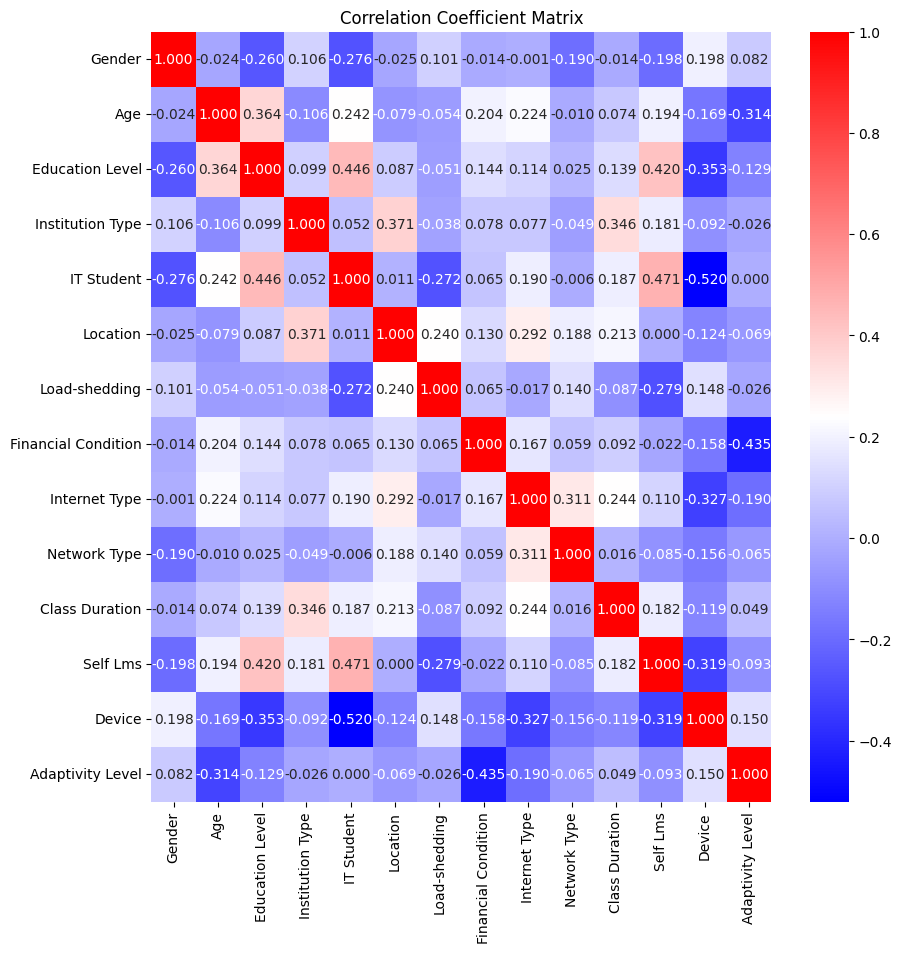

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_upsampled.corr(), fmt = ".3f", annot = True, cmap = "bwr")
plt.title("Correlation Coefficient Matrix")
plt.show()

In [ ]:
"""
The correlation between the features and the target is the most important to be able to get accurate machine learning results
"""

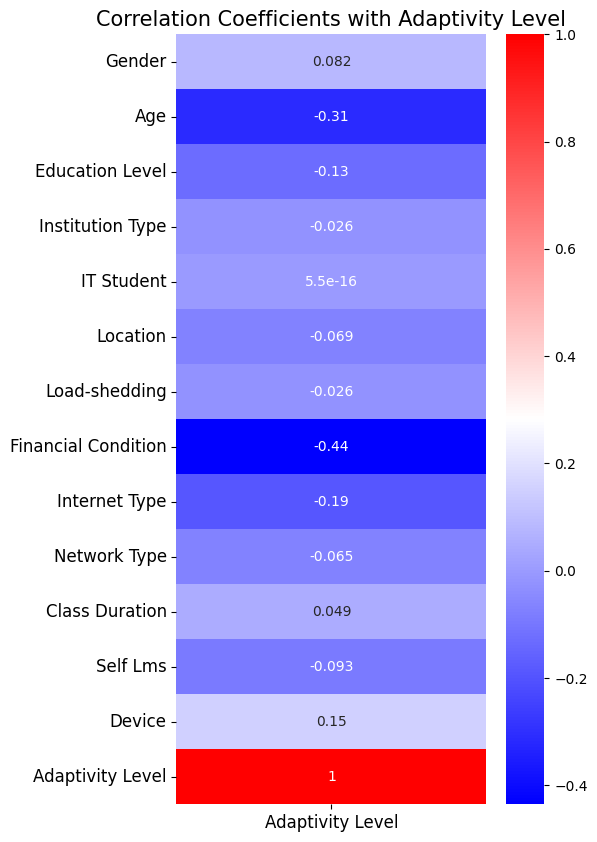

In [ ]:
plt.figure(figsize=(5, 10))
sns.heatmap(df_upsampled.corr()['Adaptivity Level'].to_frame(), annot=True, cmap="bwr")
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Correlation Coefficients with Adaptivity Level", fontsize=15)
plt.show()


In [ ]:
"""
Let's prepare the X (features) and the Y (target)
"""

In [ ]:
X = df_upsampled.drop(columns = "Adaptivity Level")
Y = df_upsampled["Adaptivity Level"]

In [ ]:
"""
Split them using train_test_split with 80% training and 20% testing
"""

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
"""
Regularization is important here we use the Lasso L1 to feature select the important ones only
"""

In [ ]:
lasso_regularization = Lasso(alpha = 0.01)
lasso_regularization.fit(X_train, Y_train)
for feature, coef in zip(X_train.columns, lasso_regularization.coef_):
  print(f'{feature}:  {coef}')


Gender:  0.10141357387702085
Age:  -0.14139454867077084
Education Level:  0.0
Institution Type:  -0.04203095251775902
IT Student:  0.18435836552901017
Location:  -0.028509521622451812
Load-shedding:  -0.0
Financial Condition:  -0.3789835381376171
Internet Type:  -0.12417795305848882
Network Type:  -0.0
Class Duration:  0.16571024078231264
Self Lms:  -0.13941261486557702
Device:  0.06737758114918677


In [ ]:
"""
Observation 2: Educational Level, Load-shedding and Network Type are useless features and can cause overfitting
"""

In [ ]:
"""
Drop the 3 useless features from both X_train and X_test
"""

In [ ]:
X_train.drop(['Education Level', 'Load-shedding', 'Network Type'], axis = 1)
X_test.drop(['Education Level', 'Load-shedding', 'Network Type'], axis = 1)

,Gender,Age,Institution Type,IT Student,Location,Financial Condition,Internet Type,Class Duration,Self Lms,Device
995,1,2,0,0,0,2,0,1,0,1
509,1,1,1,0,1,0,0,1,0,1
831,0,1,1,0,0,0,0,1,0,1
162,0,2,0,0,0,1,0,1,0,1
300,0,3,1,0,1,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
209,1,3,1,1,1,0,1,2,1,1
1141,0,1,1,0,1,2,0,1,0,1
619,0,3,1,0,1,2,1,2,0,0
341,1,3,0,1,1,0,0,1,0,1


In [ ]:
"""
Building our first machine learning model which I choose it to be  the DecisionTreeClassifier
and do the GridSearchCV hyperparameter tuning to find the best parameters for this model
"""

In [ ]:
tree = DecisionTreeClassifier()
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', None],
    'random_state': [0]
}
grid_search_decision_tree = GridSearchCV(estimator = tree, param_grid = tree_params, cv = 5, verbose = 1)
grid_search_decision_tree.fit(X_train, Y_train)
best_decision_tree = grid_search_decision_tree.best_estimator_
print(grid_search_decision_tree.best_params_)
print(best_decision_tree.score(X_test, Y_test))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
0.9333333333333333


In [ ]:
"""
Use bagging method to try and increase the accuracy
"""

In [ ]:
bagged_tree = BaggingClassifier(estimator = tree, n_estimators = 10, random_state = 0)
bagged_tree.fit(X_train, Y_train)
print(bagged_tree.score(X_test, Y_test))

0.912


In [ ]:
"""
Use boosting method to try and increase the accuracy
"""

In [ ]:
boosted_tree = AdaBoostClassifier(estimator = tree, n_estimators = 10, random_state = 0)
boosted_tree.fit(X_train, Y_train)
print(boosted_tree.score(X_test, Y_test))

0.928


In [ ]:
forest = RandomForestClassifier()
forest_params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0]
}
grid_search_random_forest = GridSearchCV(estimator = forest, param_grid = forest_params, cv = 3, verbose = 1)
grid_search_random_forest.fit(X_train, Y_train)
best_random_forest = grid_search_random_forest.best_estimator_
print(grid_search_random_forest.best_params_)
print(best_random_forest.score(X_test, Y_test))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}
0.9253333333333333


In [ ]:
forest = RandomForestClassifier(criterion = 'gini', max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 9, random_state = 0)
forest.fit(X_train, Y_train)
print(forest.score(X_test, Y_test))

0.9253333333333333


In [ ]:
"""
Use bagging method to try and increase the accuracy
"""

In [ ]:

bagged_forest = BaggingClassifier(estimator = forest, n_estimators = 10, random_state = 0)
bagged_forest.fit(X_train, Y_train)
print(bagged_forest.score(X_test, Y_test))

0.9173333333333333


In [ ]:
"""
Use boosting method to try and increase the accuracy
"""

In [ ]:
boosted_forest = AdaBoostClassifier(estimator = forest, n_estimators = 10, random_state = 0)
boosted_forest.fit(X_train, Y_train)
print(boosted_forest.score(X_test, Y_test))

0.92


In [ ]:
support_vector = SVC()
support_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'random_state': [3]
}
grid_search_support_vector = GridSearchCV(estimator = support_vector, param_grid = support_params, cv = 5, verbose = 1)
grid_search_support_vector.fit(X_train, Y_train)
best_support_vecgrid_search_support_vector = grid_search_support_vector.best_estimator_
print(grid_search_support_vector.best_params_)
print(best_support_vecgrid_search_support_vector.score(X_test, Y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 3}
0.8773333333333333


In [ ]:
"""
Use bagging method to try and increase the accuracy
"""

In [ ]:
bagged_support_vector = BaggingClassifier(estimator = support_vector, n_estimators = 10, random_state = 0)
bagged_support_vector.fit(X_train, Y_train)
print(bagged_support_vector.score(X_test, Y_test))

0.8053333333333333


In [ ]:
"""
Use boosting method to try and increase the accuracy
"""

In [ ]:
boosted_support_vector = AdaBoostClassifier(estimator = support_vector, n_estimators = 10, random_state = 0, algorithm = "SAMME")
boosted_support_vector.fit(X_train, Y_train)
print(boosted_support_vector.score(X_test, Y_test))

0.304


In [ ]:
naive_classifier = GaussianNB()
naive_classifier.fit(X_train, Y_train)
print(naive_classifier.score(X_test, Y_test))

0.6586666666666666


In [ ]:
logistic_regression = LogisticRegression()
logistic_params = {
    'C': [0.001, 0.01, 0.1, 1, 10]
}
grid_search_logistic_regression = GridSearchCV(estimator = logistic_regression, param_grid = logistic_params, cv = 5, verbose = 1)
grid_search_logistic_regression.fit(X_train, Y_train)
best_logistic_regression = grid_search_logistic_regression.best_estimator_
print(grid_search_logistic_regression.best_params_)
print(best_logistic_regression.score(X_test, Y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'C': 10}
0.7093333333333334


In [ ]:
"""
Use bagging method to try and increase the accuracy
"""

In [ ]:
bagged_logistic = BaggingClassifier(estimator = logistic_regression, n_estimators = 10, random_state = 0)
bagged_logistic.fit(X_train, Y_train)
print(bagged_logistic.score(X_test, Y_test))

0.6906666666666667


In [ ]:
"""
Use boosting method to try and increase the accuracy
"""

In [ ]:
boosted_logistic = AdaBoostClassifier(estimator = logistic_regression, n_estimators = 10, random_state = 0)
boosted_logistic.fit(X_train, Y_train)
print(boosted_logistic.score(X_test, Y_test))

0.6373333333333333


In [ ]:
knn_classifier = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 40, 80],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
grid_search_knn_classifier = GridSearchCV(estimator = knn_classifier, param_grid = knn_params, cv = 5, verbose = 1)
grid_search_knn_classifier.fit(X_train, Y_train)
best_knn_classifier = grid_search_knn_classifier.best_estimator_
print(grid_search_knn_classifier.best_params_)
print(best_knn_classifier.score(X_test, Y_test))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'distance'}
0.9226666666666666


In [ ]:
estimators_voting = [
        ('tree', tree),
        ('forest', forest),
        ('support_vector', support_vector),
        ]

voting_classifier = VotingClassifier(estimators = estimators_voting, voting = 'hard')
voting_classifier.fit(X_train, Y_train)
print(voting_classifier.score(X_test, Y_test))

0.912


In [ ]:
"""
Use bagging method to try and increase the accuracy
"""

In [ ]:
bagged_voting_classifier = BaggingClassifier(estimator = voting_classifier, n_estimators = 10, random_state = 0)
bagged_voting_classifier.fit(X_train, Y_train)
print(bagged_voting_classifier.score(X_test, Y_test))

0.92


In [ ]:
"""
Use boosting method to try and increase the accuracy
"""

In [ ]:
boosted_voting_classifier = AdaBoostClassifier(estimator = voting_classifier, n_estimators = 10, random_state = 0, algorithm = "SAMME")
boosted_voting_classifier.fit(X_train, Y_train)
print(boosted_voting_classifier.score(X_test, Y_test))

0.9253333333333333


In [ ]:
xgboost = XGBClassifier()
xgboost_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 7],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.2],
    'subsample': [0.6, 1.0],
    'colsample_bytree': [0.6, 1.0],
    'reg_alpha': [0,  0.1],
    'reg_lambda': [0, 0.1],
    'random_state': [0]
}
grid_search_xgboost = GridSearchCV(estimator = xgboost, param_grid = xgboost_params, cv = 5, verbose = 1)
grid_search_xgboost.fit(X_train, Y_train)
best_xgboost = grid_search_xgboost.best_estimator_
print(grid_search_xgboost.best_params_)
print(best_xgboost.score(X_test, Y_test))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.6}
0.9253333333333333


In [ ]:
"""
Use stacking ensemble method to try improve accuracy
"""

In [ ]:
estimators_stacking = [
    ('tree', tree),
    ('forest', forest),
    ('support_vector', support_vector),
    ('xgboost', xgboost)
]
stacking_classifier = StackingClassifier(estimators = estimators_stacking, final_estimator = GaussianNB())
stacking_classifier.fit(X_train, Y_train)
print(stacking_classifier.score(X_test, Y_test))

0.9333333333333333


In [ ]:
"""
Use bagging method to try and increase the accuracy
"""

In [ ]:
bagging_xgb_classifier = BaggingClassifier(estimator = xgboost, n_estimators = 10, random_state = 0)
bagging_xgb_classifier.fit(X_train, Y_train)
print(bagging_xgb_classifier.score(X_test, Y_test))

0.9173333333333333


In [ ]:
"""
Use boosting method to try and increase the accuracy
"""

In [ ]:
boosted_xgb_classifier = AdaBoostClassifier(estimator = xgboost, n_estimators = 10, random_state = 0)
boosted_xgb_classifier.fit(X_train, Y_train)
print(boosted_xgb_classifier.score(X_test, Y_test))

0.3253333333333333


In [ ]:
"""
The best accuracy I was able to get was 0.933333 which came from both the DecisionTree and the stacking ensemble method
So and to reduce the computational power needed the best chosen model is the DecisionTree
"""

In [ ]:
"""
Do cross validation to ensure that the best model doesn't have overfitting issues
"""

"\nDo cross validation to ensure that the best model doesn't have overfitting issues\n"

In [ ]:
cross_score = cross_val_score(best_decision_tree, X_train, Y_train, cv = 5)
print(f'Cross Validation Score: {cross_score}')
print(f'Mean Of Cross Validation Score: {np.mean(cross_score)}')


Cross Validation Score: [0.94333333 0.92       0.92       0.92333333 0.91666667]
Mean Of Cross Validation Score: 0.9246666666666666


In [ ]:
"""
Evaluation
"""

In [ ]:
Y_pred = best_decision_tree.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       122
           1       0.91      0.94      0.93       114
           2       0.95      0.87      0.91       139

    accuracy                           0.93       375
   macro avg       0.93      0.94      0.93       375
weighted avg       0.93      0.93      0.93       375



<Axes: >

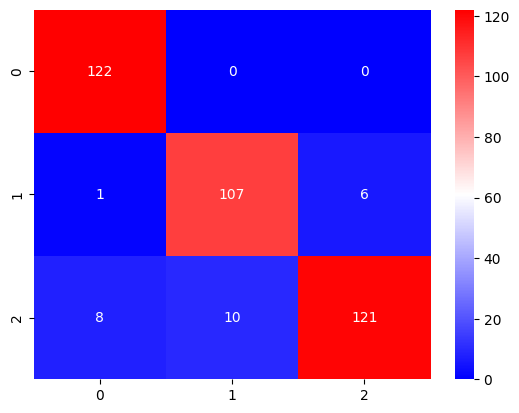

In [ ]:
sns.heatmap(cm, annot = True, fmt = ".0f", cmap="bwr")

In [ ]:
"""
In conclusion I discovered that the dataset was not perfect and that there is no way not preprocessing not hyperparameter
tuning can increase the accuracy over the 93.33%
"""